In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
mpl.rcParams['figure.figsize'] = (9,6)
np.set_printoptions(suppress=True)
pd.options.display.max_columns = 150

FILES:

    - application_test.csv.zip
    - application_train.csv.zip

    - HomeCredit_columns_description.csv
    - installments_payments.csv.zip
    - POS_CASH_balance.csv.zip
    - previous_application.csv.zip
    - bureau_balance.csv.zip
    - bureau.csv.zip
    - credit_card_balance.csv.zip

## Column Descriptions

In [3]:
col_des = pd.read_csv('HomeCredit_columns_description.csv', encoding='latin-1')
col_des.shape

(219, 5)

In [4]:
col_des.head()

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In [5]:
col_des.Table.unique()

array(['application_{train|test}.csv', 'bureau.csv', 'bureau_balance.csv',
       'POS_CASH_balance.csv', 'credit_card_balance.csv',
       'previous_application.csv', 'installments_payments.csv'],
      dtype=object)

## Cleaning


  - Examine Distribution of Target (check for imbalanced classes)
  - Examine Column Types
  - Fill Missing Variables
  - Label Encode binary features and OHE multiple categorical ftrs
    - _Make sure to drop categories that are not in the test set!_
    - check out df.align?
  - Remove/Impute Anomalies
    - You can also create a categorical value (0,1) for whether or not the data was anomalous.
  - Look for correlations
  - Feature Engineering

## Applications

Main File

Contains main id. 1 Row is 1 loan.

In [96]:
app_train = pd.read_csv('application_train.csv.zip', dtype= {'SK_ID_CURR':str})
app_test = pd.read_csv('application_test.csv.zip', dtype= {'SK_ID_CURR':str})
app_train.shape, app_test.shape

((307511, 122), (48744, 121))

In [97]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [8]:
list(
    zip(col_des[col_des.Table=='application_{train|test}.csv'].Row.tolist(),col_des[col_des.Table=='application_{train|test}.csv'].Description.tolist())
)

[('SK_ID_CURR', 'ID of loan in our sample'),
 ('TARGET',
  'Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)'),
 ('NAME_CONTRACT_TYPE', 'Identification if loan is cash or revolving'),
 ('CODE_GENDER', 'Gender of the client'),
 ('FLAG_OWN_CAR', 'Flag if the client owns a car'),
 ('FLAG_OWN_REALTY', 'Flag if client owns a house or flat'),
 ('CNT_CHILDREN', 'Number of children the client has'),
 ('AMT_INCOME_TOTAL', 'Income of the client'),
 ('AMT_CREDIT', 'Credit amount of the loan'),
 ('AMT_ANNUITY', 'Loan annuity'),
 ('AMT_GOODS_PRICE',
  'For consumer loans it is the price of the goods for which the loan is given'),
 ('NAME_TYPE_SUITE',
  'Who was accompanying client when he was applying for the loan'),
 ('NAME_INCOME_TYPE',
  'Clients income type (businessman, working, maternity leave,\x85)'),
 ('NAME_EDUCATION_TYPE', 'Level of highest education t

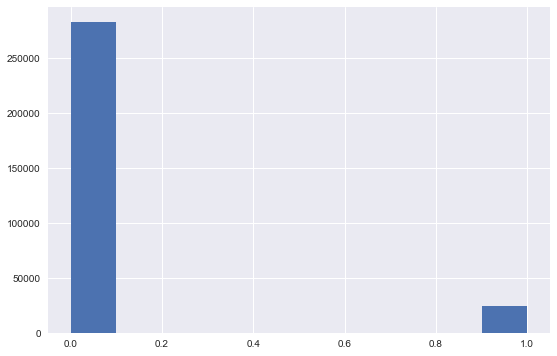

In [9]:
# Well fuck
app_train.TARGET.hist()

In [10]:
app_train.groupby('CODE_GENDER').TARGET.sum()

CODE_GENDER
F      14170
M      10655
XNA        0
Name: TARGET, dtype: int64

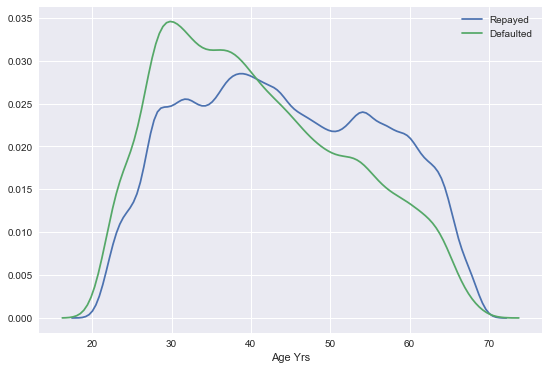

In [11]:
sns.kdeplot(app_train.loc[app_train.TARGET==0, 'DAYS_BIRTH']/-365, label = 'Repayed')
sns.kdeplot(app_train.loc[app_train.TARGET==1, 'DAYS_BIRTH']/-365, label = 'Defaulted')
plt.xlabel('Age Yrs')

### BUREAU

In [12]:
bureau = pd.read_csv("bureau.csv.zip", dtype= {'SK_ID_CURR':str, 'SK_ID_BUREAU':str})
bureau.shape

(1716428, 17)

In [13]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [14]:
list(
    zip(col_des[col_des.Table=='bureau.csv'].Row.tolist(),col_des[col_des.Table=='bureau.csv'].Description.tolist())
)

[('SK_ID_CURR',
  'ID of loan in our sample - one loan in our sample can have 0,1,2 or more related previous credits in credit bureau '),
 ('SK_BUREAU_ID',
  'Recoded ID of previous Credit Bureau credit related to our loan (unique coding for each loan application)'),
 ('CREDIT_ACTIVE', 'Status of the Credit Bureau (CB) reported credits'),
 ('CREDIT_CURRENCY', 'Recoded currency of the Credit Bureau credit'),
 ('DAYS_CREDIT',
  'How many days before current application did client apply for Credit Bureau credit'),
 ('CREDIT_DAY_OVERDUE',
  'Number of days past due on CB credit at the time of application for related loan in our sample'),
 ('DAYS_CREDIT_ENDDATE',
  'Remaining duration of CB credit (in days) at the time of application in Home Credit'),
 ('DAYS_ENDDATE_FACT',
  'Days since CB credit ended at the time of application in Home Credit (only for closed credit)'),
 ('AMT_CREDIT_MAX_OVERDUE',
  'Maximal amount overdue on the Credit Bureau credit so far (at application date of loan in

In [15]:
bureau.SK_ID_CURR.nunique(), app_train.SK_ID_CURR.nunique()

(305811, 307511)

## Bureau Balance

In [16]:
bureau_balances = pd.read_csv('bureau_balance.csv.zip',  dtype={'SK_ID_CURR':str, 'SK_ID_BUREAU':str})
bureau_balances.shape

(27299925, 3)

In [17]:
bureau_balances.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [18]:
list(
    zip(col_des[col_des.Table=='bureau_balance.csv'].Row.tolist(),col_des[col_des.Table=='bureau_balance.csv'].Description.tolist())
)

[('SK_BUREAU_ID',
  'Recoded ID of Credit Bureau credit (unique coding for each application) - use this to join to CREDIT_BUREAU table '),
 ('MONTHS_BALANCE',
  'Month of balance relative to application date (-1 means the freshest balance date)'),
 ('STATUS',
  'Status of Credit Bureau loan during the month (active, closed, DPD0-30,\x85 [C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between 1-30, 2 means DPD 31-60,\x85 5 means DPD 120+ or sold or written off ] )')]

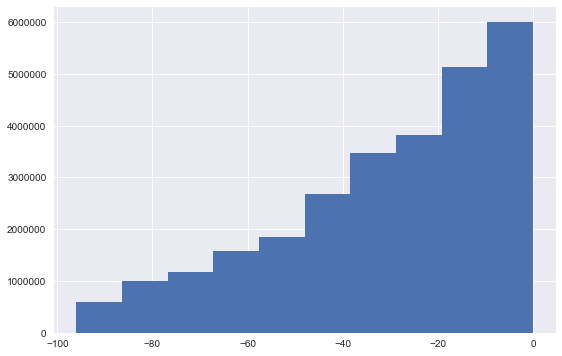

In [19]:
bureau_balances.MONTHS_BALANCE.hist()

## Credit Card Balances

In [20]:
cc_balances = pd.read_csv('credit_card_balance.csv.zip', 
                          dtype={'SK_ID_CURR':str, 'SK_ID_BUREAU':str, "SK_ID_PREV":str})
cc_balances.shape

(3840312, 23)

In [21]:
cc_balances.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [22]:
list(
    zip(col_des[col_des.Table=='credit_card_balance.csv'].Row.tolist(),col_des[col_des.Table=='credit_card_balance.csv'].Description.tolist())
)

[('SK_ID_PREV ',
  'ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)'),
 ('SK_ID_CURR', 'ID of loan in our sample'),
 ('MONTHS_BALANCE',
  'Month of balance relative to application date (-1 means the freshest balance date)'),
 ('AMT_BALANCE', 'Balance during the month of previous credit'),
 ('AMT_CREDIT_LIMIT_ACTUAL',
  'Credit card limit during the month of the previous credit'),
 ('AMT_DRAWINGS_ATM_CURRENT',
  'Amount drawing at ATM during the month of the previous credit'),
 ('AMT_DRAWINGS_CURRENT',
  'Amount drawing during the month of the previous credit'),
 ('AMT_DRAWINGS_OTHER_CURRENT',
  'Amount of other drawings during the month of the previous credit'),
 ('AMT_DRAWINGS_POS_CURRENT',
  'Amount drawing or buying goods during the month of the previous credit'),
 ('AMT_INST_MIN_REGULARITY',
  'Minimal installment for this month of the previous credit'),
 ('AMT_PAYMENT_CURRENT',
  'How

## Previous Applications

In [23]:
prev_apps = pd.read_csv('previous_application.csv.zip',
                        dtype={'SK_ID_CURR':str, 'SK_ID_BUREAU':str, "SK_ID_PREV":str}
                       )
prev_apps.shape

(1670214, 37)

In [24]:
prev_apps.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
list(
    zip(col_des[col_des.Table=='previous_application.csv'].Row.tolist(),col_des[col_des.Table=='previous_application.csv'].Description.tolist())
)

[('SK_ID_PREV ',
  'ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loan applications in Home Credit, previous application could, but not necessarily have to lead to credit) '),
 ('SK_ID_CURR', 'ID of loan in our sample'),
 ('NAME_CONTRACT_TYPE',
  'Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application'),
 ('AMT_ANNUITY', 'Annuity of previous application'),
 ('AMT_APPLICATION',
  'For how much credit did client ask on the previous application'),
 ('AMT_CREDIT',
  'Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT'),
 ('AMT_DOWN_PAYMENT', 'Down payment on the previous application'),
 ('AMT_GOODS_PRICE',
  'Goods price of good that client asked for (if applicable) on the pr

In [26]:
# Current loans appear multiple times (aka as man as 77 previous apps)
prev_apps.SK_ID_CURR.value_counts().unique()

array([77, 73, 72, 68, 67, 66, 64, 63, 62, 61, 60, 59, 58, 55, 54, 53, 52,
       51, 50, 49, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34,
       33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17,
       16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [27]:
prev_apps.SK_ID_PREV.duplicated().sum() 

0

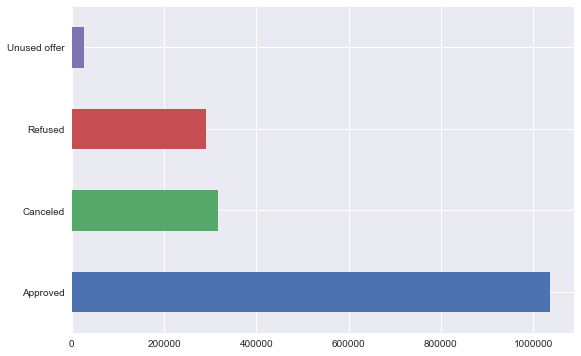

In [28]:
prev_apps.NAME_CONTRACT_STATUS.value_counts().plot.barh()

## POS Cash Balances

In [29]:
pos_cb = pd.read_csv('POS_CASH_balance.csv.zip',
                     dtype={'SK_ID_CURR':str, 'SK_ID_BUREAU':str, "SK_ID_PREV":str}
                    )
pos_cb.shape

(10001358, 8)

In [30]:
list(
    zip(col_des[col_des.Table=='POS_CASH_balance.csv'].Row.tolist(),col_des[col_des.Table=='POS_CASH_balance.csv'].Description.tolist())
)

[('SK_ID_PREV ',
  'ID of previous credit in Home Credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)'),
 ('SK_ID_CURR', 'ID of loan in our sample'),
 ('MONTHS_BALANCE',
  'Month of balance relative to application date (-1 means the information to the freshest monthly snapshot, 0 means the information at application - often it will be the same as -1 as many banks are not updating the information to Credit Bureau regularly )'),
 ('CNT_INSTALMENT', 'Term of previous credit (can change over time)'),
 ('CNT_INSTALMENT_FUTURE', 'Installments left to pay on the previous credit'),
 ('NAME_CONTRACT_STATUS', 'Contract status during the month'),
 ('SK_DPD', 'DPD (days past due) during the month of previous credit'),
 ('SK_DPD_DEF',
  'DPD during the month with tolerance (debts with low loan amounts are ignored) of the previous credit')]

4231

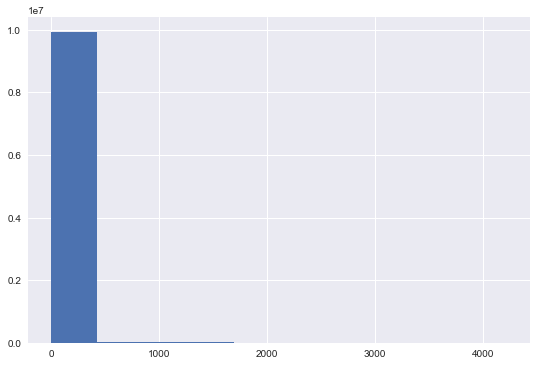

In [31]:
pos_cb.SK_DPD.hist()
pos_cb.SK_DPD.max()

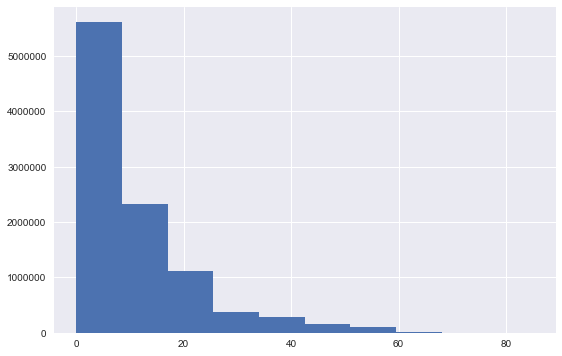

In [32]:

pos_cb.CNT_INSTALMENT_FUTURE.hist()

## Installments Payments

In [33]:
payments = pd.read_csv('installments_payments.csv.zip',
                       dtype={'SK_ID_CURR':str, 'SK_ID_BUREAU':str, "SK_ID_PREV":str}
                      )
payments.shape

(13605401, 8)

In [34]:
payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [35]:
list(
    zip(col_des[col_des.Table=='installments_payments.csv'].Row.tolist(),col_des[col_des.Table=='installments_payments.csv'].Description.tolist())
)

[('SK_ID_PREV ',
  'ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)'),
 ('SK_ID_CURR', 'ID of loan in our sample'),
 ('NUM_INSTALMENT_VERSION',
  'Version of installment calendar (0 is for credit card) of previous credit. Change of installment version from month to month signifies that some parameter of payment calendar has changed'),
 ('NUM_INSTALMENT_NUMBER', 'On which installment we observe payment'),
 ('DAYS_INSTALMENT',
  'When the installment of previous credit was supposed to be paid (relative to application date of current loan)'),
 ('DAYS_ENTRY_PAYMENT',
  'When was the installments of previous credit paid actually (relative to application date of current loan)'),
 ('AMT_INSTALMENT',
  'What was the prescribed installment amount of previous credit on this installment'),
 ('AMT_PAYMENT',
  'What the client actually paid on previous credit on this installment')]

In [36]:
(payments.AMT_INSTALMENT - payments.AMT_PAYMENT).describe()

count    1.360250e+07
mean    -1.871538e+02
std      1.910673e+04
min     -2.630909e+06
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.424726e+06
dtype: float64

## Clean and Combine

    - Applications
    - Bureau & Bureau Balance
    - Credit Card Balances
    - Payments
    - pos_cb
    - prev_apps
    
   

In [37]:
from dstk.utils.data_cleaning import clean_columns

### Applications

In [98]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Clean Columns

In [99]:
# clean columns
app_train.columns = clean_columns(app_train)
app_test.columns = clean_columns(app_test)
app_train.shape, app_test.shape

((307511, 122), (48744, 121))

#### Check Column Types

In [100]:
app_train.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64')], dtype=object)

In [101]:
pk = ['sk_id_curr']
tgt = ['target']
obj_cols = app_train.dtypes[app_train.dtypes=='object'].index.drop(pk).tolist()
int_cols = app_train.dtypes[app_train.dtypes=='int64'].index.tolist()
float_cols = app_train.dtypes[app_train.dtypes=='float64'].index.tolist()
indicator_cols = []


numeric_cols = int_cols + float_cols

Some columns are already encoded

will come back to this?

In [102]:
indicator_cols.extend(app_train[numeric_cols].nunique()[app_train[numeric_cols].nunique() == 2].index.tolist())
int_cols = [i for i in int_cols if i not in indicator_cols]
float_cols = [i for i in float_cols if i not in indicator_cols]


numeric_cols = int_cols + float_cols

In [103]:
# Target column separate
for c in tgt:
    indicator_cols.remove(c)

In [104]:
# not sure what to do about these :-/
# NOTE nunique() does NOT count nans!
app_train[numeric_cols].nunique()[app_train[numeric_cols].nunique() < 10]

region_rating_client           3
region_rating_client_w_city    3
def_60_cnt_social_circle       9
amt_req_credit_bureau_hour     5
amt_req_credit_bureau_day      9
amt_req_credit_bureau_week     9
dtype: int64

In [105]:
def col_descrip(table, col):
    print(table)
    print(col)
    return col_des.loc[(col_des.Table==table) & (col_des.Row==col.upper()), 
            'Description'].values[0]

In [106]:
col_descrip('application_{train|test}.csv', 'region_rating_client')

application_{train|test}.csv
region_rating_client


'Our rating of the region where client lives (1,2,3)'

In [107]:
col_descrip('application_{train|test}.csv', 'amt_req_credit_bureau_day')

application_{train|test}.csv
amt_req_credit_bureau_day


'Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application)'

In [108]:
col_descrip('application_{train|test}.csv', 'amt_req_credit_bureau_hour')

application_{train|test}.csv
amt_req_credit_bureau_hour


'Number of enquiries to Credit Bureau about the client one hour before application'

In [109]:
app_train['amt_req_credit_bureau_day'].unique()

array([ 0., nan,  1.,  3.,  2.,  4.,  5.,  6.,  9.,  8.])

In [110]:
len(pk) + len(tgt) + len(obj_cols) + len(int_cols) + len(float_cols), app_train.columns.shape

(90, (122,))

In [111]:
# Order the columns
app_train = app_train[pk + tgt + sorted(obj_cols) + sorted(indicator_cols) + sorted(int_cols) + sorted(float_cols)]
app_test = app_test[pk + sorted(obj_cols) + sorted(indicator_cols) + sorted(int_cols) + sorted(float_cols)]
app_train.shape, app_test.shape

((307511, 122), (48744, 121))

Days cols with negative numbers

In [112]:
# all columns that have ANY negative numbers
neg_cols = app_train[numeric_cols].loc[:,(app_train[numeric_cols] < 0).any(0)].columns

In [113]:
# make positive for interpretation sake
app_train[neg_cols] = app_train[neg_cols] * -1
app_test[neg_cols] = app_test[neg_cols] * -1

#### Anomalies

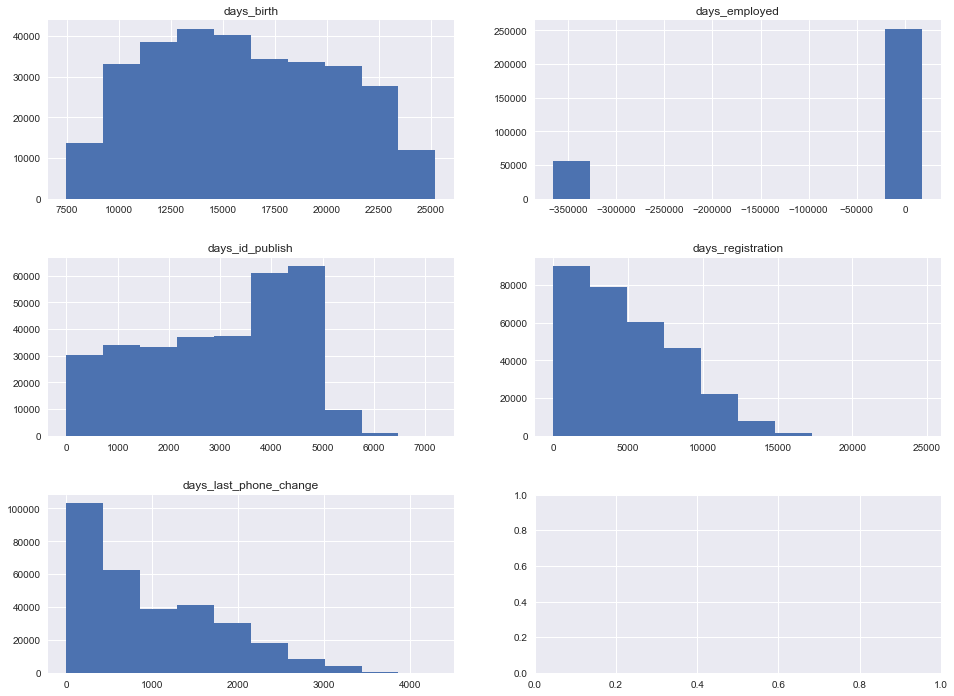

In [114]:
fig, axes = plt.subplots(int(np.ceil(len(neg_cols)/2)), 2, figsize=(16,12))
axes = axes.ravel()
for i,col in enumerate(neg_cols):
    ax = app_train[col].hist(ax=axes[i])
    ax.set_title(col)
plt.subplots_adjust(hspace=0.33)

In [115]:
# Std Largest Gap between values in each column
# Larger numbers indicate less smoothe hist?
for col in neg_cols:
    print(col+':',app_train[col].sort_values().diff().max()/app_train[col].std())

days_birth: 0.04216326290582393
days_employed: 2.585319542058563
days_id_publish: 0.42797033401512663
days_registration: 0.265123513762622
days_last_phone_change: 0.12941328212898046


In [116]:
# days_employed < 0 replace with median and create anomaly indicator column
anom_train = app_train[app_train.days_employed<0]
rest_train = app_train[app_train.days_employed>=0]
# check the target variable for these anomolies vs all others
anom_train.target.mean(), rest_train.target.mean() 

(0.05399646043269404, 0.0865997453765215)

In [117]:
# same for test
# days_employed < 0 replace with median and create anomaly indicator column
anom_test = app_test[app_test.days_employed<0]
rest_test = app_test[app_test.days_employed>=0]

In [119]:
app_train['days_employed_anom'] = 0
app_train.loc[anom_train.index, 'days_employed_anom'] = 1

app_test['days_employed_anom'] = 0
app_test.loc[anom_test.index, 'days_employed_anom'] = 1

indicator_cols.append('days_employed_anom')

The anomalies are less likely to default than the rest...

Replace with median, and create column indicating anom

In [120]:
app_train.loc[anom_train.index, 'days_employed'] = rest_train.days_employed.median()
app_test.loc[anom_test.index, 'days_employed'] = rest_test.days_employed.median()

In [121]:
# days_id_publish
col_descrip('application_{train|test}.csv', 'days_id_publish')

application_{train|test}.csv
days_id_publish


'How many days before the application did client change the identity document with which he applied for the loan'

Not sure how to do anomaly detection for all of these columns.

I'm going to apply that "largest" gap measurement and list all the ones with jumps greater than 2 standard deviations.

In [122]:
gaps = app_train[numeric_cols].apply(lambda ser: ser.sort_values().diff().max()/ser.std())
gaps[gaps>2]

cnt_children                      6.924044
amt_income_total                417.504202
cnt_fam_members                   4.392315
years_beginexpluatation_avg       2.433163
years_beginexpluatation_mode      5.227994
years_beginexpluatation_medi      6.310800
obs_30_cnt_social_circle        125.365019
def_30_cnt_social_circle         58.204816
obs_60_cnt_social_circle        124.800228
def_60_cnt_social_circle         46.923631
amt_req_credit_bureau_hour       11.926182
amt_req_credit_bureau_day        18.057483
amt_req_credit_bureau_week        4.885559
amt_req_credit_bureau_mon         3.275101
amt_req_credit_bureau_qrt       304.764534
dtype: float64

cnt_children

In [123]:
# I honestly don't know. It's possible in theory
app_train.cnt_children.value_counts().sort_index()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
8          2
9          2
10         2
11         1
12         2
14         3
19         2
Name: cnt_children, dtype: int64

amt_income_total

In [127]:
app_train.amt_income_total.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: amt_income_total, dtype: float64

In [135]:
# Impute w median
super_rich_train = app_train.loc[app_train.amt_income_total>=10000000, tgt+['amt_income_total']]
reg_train = app_train.loc[app_train.amt_income_total<10000000, tgt+['amt_income_total']]

super_rich_test = app_test.loc[app_test.amt_income_total>=10000000, tgt+['amt_income_total']]
reg_test = app_test.loc[app_test.amt_income_total<10000000, tgt+['amt_income_total']]

# impute
app_train.loc[super_rich_train.index, 'amt_income_total'] = reg_train.amt_income_total.median()
# still imputing with training value!
app_test.loc[super_rich_test.index, 'amt_income_total'] = reg_train.amt_income_total.median()

/Users/rick.shapiro/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/rick.shapiro/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


cnt_fam_members

In [139]:
# consistent with ct_children
app_train.cnt_fam_members.value_counts().sort_index()

1.0      67847
2.0     158356
3.0      52600
4.0      24696
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
11.0         1
12.0         2
13.0         1
14.0         2
15.0         1
16.0         2
20.0         2
Name: cnt_fam_members, dtype: int64

years_beginexpluatation_mode

In [141]:
# I don't know what these are. Wouldn't 0 be impossible?
col_descrip('application_{train|test}.csv', 'years_beginexpluatation_mode')

application_{train|test}.csv
years_beginexpluatation_mode


'Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor'

Social Circle

In [165]:
col_descrip('application_{train|test}.csv', 'obs_30_cnt_social_circle')

application_{train|test}.csv
obs_30_cnt_social_circle


"How many observation of client's social surroundings with observable 30 DPD (days past due) default"

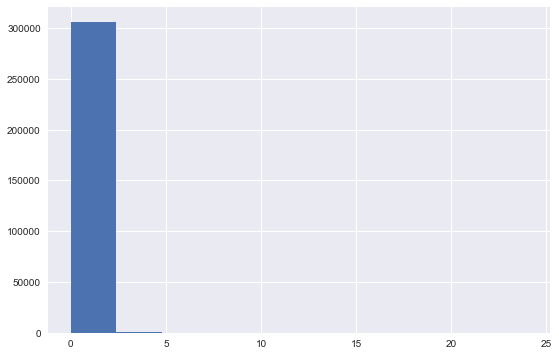

In [181]:
app_train.def_60_cnt_social_circle.hist()

In [162]:
max_diff = app_train.obs_30_cnt_social_circle.sort_values().diff().nlargest(3).index
app_train.loc[max_diff, 'obs_30_cnt_social_circle']

148403    348.0
77497      47.0
180587      1.0
Name: obs_30_cnt_social_circle, dtype: float64

In [167]:
anom_train = app_train[app_train.obs_30_cnt_social_circle>=40]
reg_train = app_train[app_train.obs_30_cnt_social_circle<40]

anom_test = app_test[app_test.obs_30_cnt_social_circle>=40]
reg_test = app_test[app_test.obs_30_cnt_social_circle<40]

# impute
app_train.loc[anom_train.index, 'obs_30_cnt_social_circle'] = reg_train.obs_30_cnt_social_circle.median()
app_test.loc[anom_test.index, 'obs_30_cnt_social_circle'] = reg_train.obs_30_cnt_social_circle.median()


In [170]:
max_diff = app_train.def_30_cnt_social_circle.sort_values().diff().nlargest(3).index
app_train.loc[max_diff, 'def_30_cnt_social_circle']

148403    34.0
186378     1.0
304613     2.0
Name: def_30_cnt_social_circle, dtype: float64

In [175]:
# max value other than anom is 7. Choosing 10 arbitrarily
anom_train = app_train.def_30_cnt_social_circle[app_train.def_30_cnt_social_circle>=10]
rest_train = app_train.def_30_cnt_social_circle[app_train.def_30_cnt_social_circle<10]

anom_test = app_test.def_30_cnt_social_circle[app_test.def_30_cnt_social_circle>=10]

# impute
app_train.loc[anom_train.index, 'def_30_cnt_social_circle'] = rest_train.median()
app_test.loc[anom_test.index, 'def_30_cnt_social_circle'] = rest_train.median()


In [177]:
max_diff = app_train.obs_60_cnt_social_circle.sort_values().diff().nlargest(3).index
app_train.loc[max_diff, 'obs_60_cnt_social_circle']

148403    344.0
77497      47.0
222315      1.0
Name: obs_60_cnt_social_circle, dtype: float64

In [178]:
anom_train = app_train[app_train.obs_60_cnt_social_circle>=40]
reg_train = app_train[app_train.obs_60_cnt_social_circle<40]

anom_test = app_test[app_test.obs_60_cnt_social_circle>=40]

# impute
app_train.loc[anom_train.index, 'obs_60_cnt_social_circle'] = reg_train.obs_60_cnt_social_circle.median()
app_test.loc[anom_test.index, 'obs_60_cnt_social_circle'] = reg_train.obs_60_cnt_social_circle.median()


In [182]:
max_diff = app_train.def_60_cnt_social_circle.sort_values().diff().nlargest(3).index
app_train.loc[max_diff, 'def_60_cnt_social_circle']

148403    24.0
211983     1.0
144501     2.0
Name: def_60_cnt_social_circle, dtype: float64

In [183]:
app_train.def_60_cnt_social_circle.nlargest(3)

148403    24.0
133829     7.0
198047     6.0
Name: def_60_cnt_social_circle, dtype: float64

In [184]:
anom_train = app_train[app_train.def_60_cnt_social_circle>=10]
reg_train = app_train[app_train.def_60_cnt_social_circle<10]

anom_test = app_test[app_test.def_60_cnt_social_circle>=10]

# impute
app_train.loc[anom_train.index, 'def_60_cnt_social_circle'] = reg_train.def_60_cnt_social_circle.median()
app_test.loc[anom_test.index, 'def_60_cnt_social_circle'] = reg_train.def_60_cnt_social_circle.median()


amt_req_credit_bureau_qrt (credit enquireies)

hour, day, week, mon, qrt

In [200]:
col_descrip('application_{train|test}.csv', 'amt_req_credit_bureau_day')

application_{train|test}.csv
amt_req_credit_bureau_day


'Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application)'

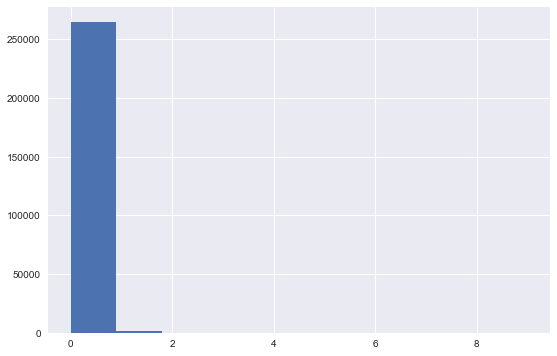

In [201]:
app_train.amt_req_credit_bureau_day.hist()

In [190]:
max_diff = app_train.amt_req_credit_bureau_qrt.sort_values().diff().nlargest(3).index
app_train.loc[max_diff, 'amt_req_credit_bureau_qrt']

239474    261.0
253541     19.0
117111      1.0
Name: amt_req_credit_bureau_qrt, dtype: float64

In [191]:
app_train.amt_req_credit_bureau_qrt.nlargest(3)

239474    261.0
253541     19.0
3770        8.0
Name: amt_req_credit_bureau_qrt, dtype: float64

In [193]:
# arbitrary cutoff at 100... 1 per day seems extreme
anom_train = app_train[app_train.amt_req_credit_bureau_qrt>=100]
reg_train = app_train[app_train.amt_req_credit_bureau_qrt<10]

anom_test = app_test[app_test.amt_req_credit_bureau_qrt>=10]

# impute
app_train.loc[anom_train.index, 'amt_req_credit_bureau_qrt'] = reg_train.amt_req_credit_bureau_qrt.median()
app_test.loc[anom_test.index, 'amt_req_credit_bureau_qrt'] = reg_train.amt_req_credit_bureau_qrt.median()


In [195]:
max_diff = app_train.amt_req_credit_bureau_mon.sort_values().diff().nlargest(3).index
app_train.loc[max_diff, 'amt_req_credit_bureau_mon']

266065    22.0
253488    27.0
163616     1.0
Name: amt_req_credit_bureau_mon, dtype: float64

In [196]:
# I'm gonna leave this - i don't know enough to say this isn't possible.
app_train.amt_req_credit_bureau_mon.nlargest(3)

253488    27.0
12869     24.0
88209     23.0
Name: amt_req_credit_bureau_mon, dtype: float64

In [197]:
max_diff = app_train.amt_req_credit_bureau_week.sort_values().diff().nlargest(3).index
app_train.loc[max_diff, 'amt_req_credit_bureau_week']

81488     1.0
206751    2.0
43279     3.0
Name: amt_req_credit_bureau_week, dtype: float64

In [198]:
# also leaving it even though it seems extreme
app_train.amt_req_credit_bureau_week.nlargest(3) 

87374     8.0
126468    8.0
178835    8.0
Name: amt_req_credit_bureau_week, dtype: float64

In [204]:
max_diff = app_train.amt_req_credit_bureau_day.sort_values().diff().nlargest(3).index
app_train.loc[max_diff, 'amt_req_credit_bureau_day']

126946    8.0
230674    1.0
61236     2.0
Name: amt_req_credit_bureau_day, dtype: float64

In [206]:
app_train.amt_req_credit_bureau_day.nlargest(10) 

110127    9.0
126468    9.0
126946    8.0
28534     6.0
165196    6.0
170478    6.0
183941    6.0
194489    6.0
204001    6.0
238129    6.0
Name: amt_req_credit_bureau_day, dtype: float64

In [207]:
app_train.amt_req_credit_bureau_hour.nlargest(10) 

153915    4.0
27403     3.0
28848     3.0
55853     3.0
72054     3.0
91374     3.0
110127    3.0
154787    3.0
187365    3.0
261186    3.0
Name: amt_req_credit_bureau_hour, dtype: float64

#### Fill NAs

In [ ]:
from sklearn.preprocessing import Imputer

In [ ]:
def pct_null(df):
    null_counts = df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending=False).to_frame()
    null_counts['pct_null'] = null_counts/df.shape[0]
    null_counts.columns = ['n_null', 'pct_null']
    return null_counts


In [ ]:
# good that no null primary keys
app_train[pk].isnull().sum(), app_test[pk].isnull().sum()

For columns where less than 20% is null, i'm filling with the most-frequent value

For columns where most is null i'm filling with "missing" and this will get encoded as it's own category.

__NOTE__ A _better_ strategy would be to compute how much the target distributions differ for rows where the column is null and if it is distinctly different then label as "missing" so that it is predictive. Otherwise fill with most-frequent

_OBJECT COLS_

Train

In [ ]:
obj_nulls = pct_null(app_train[obj_cols])
fill_most_frequent = obj_nulls[obj_nulls.pct_null < 0.2].index.tolist()
fill_missing = obj_nulls.index.drop(fill_most_frequent)

In [ ]:
modes = app_train[fill_most_frequent].mode().T.to_dict()[0]
app_train.fillna(modes, inplace=True)

In [ ]:
app_train.fillna(dict.fromkeys(fill_missing,'MISSING'), inplace=True)

Test

In [ ]:
obj_nulls = pct_null(app_test[obj_cols])
fill_most_frequent = obj_nulls[obj_nulls.pct_null < 0.2].index.tolist()
fill_missing = obj_nulls.index.drop(fill_most_frequent)

In [ ]:
# Note i'm filling with most-frequents from train data even for test missings
modes = app_train[fill_most_frequent].mode().T.to_dict()[0]
app_test.fillna(modes, inplace=True)

In [ ]:
app_test.fillna(dict.fromkeys(fill_missing,'MISSING'), inplace=True)

#### Convert Categorical Variables To Numeric

Label Encode binary categoricals and OHE other categoricals with multiple values

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
# first make sure no columns have only 1 value
app_train.columns[app_train.nunique() < 2]

In [ ]:
binary_cols = app_train[obj_cols].nunique()[app_train[obj_cols].nunique() ==2].index.tolist()
binary_cols

In [ ]:
lcoder = LabelEncoder()
for col in binary_cols:
    print(col)
    if not set(app_train[col].unique()) == set(app_test[col].unique()):
        print(f'{col} is not Binary!')
        print('Values in train:', set(app_train[col].unique()))
        print('Values in test:', set(app_train[col].unique()))
        continue
    app_train[col] = lcoder.fit_transform(app_train[col])
    app_test[col] = lcoder.transform(app_test[col])

In [ ]:
# One hot encode
non_binary_cats = [col for col in obj_cols if col not in binary_cols]
non_binary_cats

In [ ]:
for col in non_binary_cats:
    print(col)
    ohe_train = pd.get_dummies(app_train[col]) # drop_first?
    ohe_train.columns = col + '_' + ohe_train.columns
    
    ohe_test = pd.get_dummies(app_test[col]) # they might not align if I drop_first...
    ohe_test.columns = col + '_' + ohe_test.columns
    ohe_test = ohe_test.align(ohe_train, 'left', 1)[0].fillna(0)
    
    # now drop first
    ohe_train.drop(ohe_train.columns[0], axis=1, inplace=True)
    ohe_test.drop(ohe_train.columns[0], axis=1, inplace=True) # should be the same first column, but just incase
    
    app_train = pd.concat([app_train, ohe_train], axis=1)
    app_test = pd.concat([app_test, ohe_train], axis=1)
    print(app_train.shape, app_test.shape)
    del app_train[col]
    del app_test[col]
    obj_cols.remove(col)

In [ ]:
app_train.dtypes.value_counts()

#### Correlations (& Collinearity)

I want to trim down those big red blocks to get rid of colinearity.

Going to keep a few selected ones and then drop the rest. 

NOTE alternatively you should try dimensionality reduction (eg PCA)

In [ ]:
plt.figure(figsize = (16,12))
null_col_corrs = app_train[['target']+null_cts.index.tolist()].corr()
sns.heatmap(null_col_corrs)

ax = plt.gca()
tick_labels = ax.get_yticklabels()


In [ ]:
drop_cols = null_col_corrs.columns[1:46]
# these are not part of the big red block
drop_cols = drop_cols.drop(['own_car_age', 'ext_source_1'])
# these we can keep separately
drop_cols = drop_cols.drop(['years_beginexpluatation_medi','years_beginexpluatation_mode','years_beginexpluatation_avg'])
# keep the one that has the highest total correlations (hopefully explains most of what we are dropping)
drop_cols = drop_cols.drop(null_col_corrs.loc[drop_cols, drop_cols].sum(axis=0).idxmax())


In [ ]:
# drop them
app_train.drop(drop_cols, axis=1, inplace=True)

app_train.shape

In [ ]:
null_cts = pct_null(app_train)
null_cts

In [ ]:
imputr = Imputer(strategy = 'most_frequent')
imputr.fit_transform(app_train[app_train.columns[app_train.columns.str.startswith('amt')]])

In [ ]:
app_train.dtypes